## Experiments for Trustworthy AI Project

#### 1. Installing Packages and Dependencies 

In [1]:
# make sure that you installed those dependencies; ChatGPT won't work without the latest version of openai
%pip install openai
%pip install python-dotenv
%pip install requests
%pip install --upgrade openai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 0.27.2
    Uninstalling openai-0.27.2:
      Successfully uninstalled openai-0.27.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install python-decouple

In [7]:
# import the necessary libraries
import os
import json
from decouple import config
import matplotlib.pyplot as plt
import pandas as pd
import openai
import random

In [8]:
from decouple import config

OPENAI_API_KEY = config('API_KEY')
openai.api_key = OPENAI_API_KEY


#### 2. Loading the Data 

In [13]:
# Load the JSON file from the reclor folder 
with open('./reclor_data/train.json') as f:
    data = json.load(f)

# Check the length of the data
print(len(data))

4638


In [9]:
# Load the JSON file
with open('./reclor_data/train.json') as f:
    reclor_train_data = json.load(f)

# Cut the data to 10, 50, 100, 1000 samples
reclor_train_data_10 = random.sample(reclor_train_data, 10)
reclor_train_data_50 = random.sample(reclor_train_data, 50)
reclor_train_data_100 = random.sample(reclor_train_data, 100)
reclor_train_data_1000 = random.sample(reclor_train_data, 1000)

#### 3.1 Experiment on ChatGPT

In [ ]:
# begin the chatgpt experiment by prompting the model with a question in the sampled data

# answer_list = []

# for reclor_quesiton in reclor_train_data_10:
#     single_answer = {}
#     context = reclor_quesiton['context']
#     question = reclor_quesiton['question']
#     answers = reclor_quesiton['answers']
#     id_string = reclor_quesiton['id_string']
#     label = reclor_quesiton['label']
    
#     answer_obj = openai.ChatCompletion.create(
#         model="gpt-3.5-turbo",
#         messages=[
#             {"role": "system", "content": "You are a logician and an LSAT taker."},
#             {"role": "user", "content": f'Given the context: {context} and question {question}. \
#                 Please choose the correct answer among a list of answers given: {answers}. Give \
#                 your the answer as a number, where 0 refers to the first answer in the answer list,\
#                 1 is the second answer in the answer list, 2 is the third answer in the answer list, \
#                 and 3 is the fourth answer in the answer list. State this number first, then state your\
#                 confidence in that answer, finally give an explanation of the general logical reasoning \
#                 you used to find the answer. Sample Response "The answer is 0. I am 33 percent confident\
#                 that my answer is right. This is in accordance with the following facts...."'},
#         ]
#     )
    
#     chatgpt_answer = answer_obj["choices"][0]["message"]["content"]
    
#     single_answer['id'] = id_string
#     single_answer['correct_answer'] = label
#     single_answer['chat_gptanswer'] = chatgpt_answer
    
#     answer_list.append(single_answer)
    
# answer_list


In [47]:
# Write the answer in a JSON format, very important if you don't want to waste money. If you don't do this, I will be charged for every single request you make to the API
# with open('reclor_1000_response.json', 'w') as file:
#     json.dump(answer_list, file)


In [48]:
import json
# if you want to load the JSON file, you can do it like this

with open('reclor_1000_response.json', 'r') as f:
    # Load the contents of the file into a list
    answer_list = json.load(f)

# Print the list
# print(answer_list)


In [49]:
answer_list[0]

{'id': 'train_3350',
 'correct_answer': 2,
 'chat_gptanswer': "\n\nThe answer is 2. I am 90% confident with my answer. The principle suggests that the Thimble Corporation has an obligation to rectify any unfair result of the situation they have created. Therefore, if there's a possibility that some customers did not apply for the rebate due to the incorrect expiration date, the Thimble Corporation should identify them and offer them the rebate to rectify the unfair result of their mistake."}

In [50]:
import re
import copy

# deep copy the list
answer_list_copy = copy.deepcopy(answer_list)

new_list1 = []
# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in answer_list_copy:
    # Use regular expressions to extract the answer label 
    response = {}
    
    answer_match = re.search(r'(\b[0-9]\b)', item['chat_gptanswer'])
    percentage_matches = re.findall(
        r'\b[1-9]\d{1,2}\b', item['chat_gptanswer'])

    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    if answer_match:
        # Update the dictionary value with the extracted number
        response['chat_gptanswer'] = int(answer_match.group(1))
        response['explanation'] = [".".join(item['chat_gptanswer'].split('.')[2:])]
    else:
        # If the regular expression doesn't match, set the value to None
        print(f'warning + {response["id"]}')
        continue  
    if percentage_matches: 
        response['confidence'] = int(percentage_matches[0])
    else: 
        print(f'warning + {response["id"]}')
        continue
    new_list1.append(response)
# Print the updated list of dictionaries
# print(new_list1)


warning + train_4569
warning + train_4134
warning + train_1654
warning + train_3263


In [51]:
import pandas as pd

df_chatgpt = pd.DataFrame(new_list1)
df_chatgpt.head()


,id,correct_answer,chat_gptanswer,explanation,confidence
0,train_3350,2,2,[ The principle suggests that the Thimble Corp...,90
1,train_2036,0,0,[ The argument in the answer 0 shares the same...,90
2,train_3344,3,2,[],90
3,train_4476,0,1,[],80
4,train_4317,1,1,[ The information supports the conclusion that...,100


In [53]:
df_chatgpt['chatgpt_correct'] = df_chatgpt.apply(
    lambda row: 1 if row['correct_answer'] == row['chat_gptanswer'] else 0, axis=1)

percent_correct = df_chatgpt['chatgpt_correct'].sum() / df_chatgpt.shape[0] * 100.0
print(f"Percent of Qs that chatgpt got correct out of 1000 is {percent_correct:.2f}%")


Percent of Qs that chatgpt got correct out of 1000 is 58.23%


In [17]:
df_chatgpt['confidence'].mean()


89.68975903614458

In [19]:
filtered_df = df_chatgpt[df_chatgpt['chatgpt_correct'] != 1]


In [20]:
filtered_df['confidence'].mean()

89.14663461538461

In [21]:
filtered_df = df_chatgpt[df_chatgpt['chatgpt_correct'] != 0]

In [22]:
filtered_df['confidence'].mean()

90.07931034482759

In [72]:
correct_df = df_chatgpt[df_chatgpt['correct_answer'] == df_chatgpt['chat_gptanswer']]

In [22]:
# change the below to a list 
correct_df['id']

correct_lst = correct_df['id'].tolist()

# print(correct_lst)

In [23]:
list_of_correct_gpt3=_answers = []

for item in reclor_train_data_1000:
    if item['id_string'] in correct_lst:
        list_of_correct_gpt3.append(item)


In [24]:
len(list_of_correct_gpt3)


114

#### 3.2 Experiment on GPT3

In [ ]:
# gpt_answer_list = []

# for reclor_quesiton in reclor_train_data_1000:
#     single_answer = {}
#     context = reclor_quesiton['context']
#     quesiton = reclor_quesiton['question']
#     answers = reclor_quesiton['answers']
#     id_string = reclor_quesiton['id_string']
#     label = reclor_quesiton['label']

#     answer_obj = openai.Completion.create(
#         model="text-davinci-003",
#         max_tokens=300,
#         prompt=f'Context: {context} and question {quesiton} choosing the correct answer among a list of answers in {answers}. State the answer you have chosen, then state its position in the list of answers. For example, 0 if it is the first answer; 1 if it is the second one; 2 if it is the third one, 3 if it is the fourth one. Give me the response in this format: "The answer label is 1. Not all people are bad at math." Answer: ?',
#     )

#     gpt3_answer = answer_obj["choices"][0]["text"]

#     single_answer['id'] = id_string
#     single_answer['correct_answer'] = label
#     single_answer['gpt3_answer'] = gpt3_answer

#     gpt_answer_list.append(single_answer)

# with open('reclor_1000_gpt3_response.json', 'w') as file:
#     json.dump(gpt_answer_list, file)


In [54]:
# if you just want to load the file and not run the code above

import json

# Open the JSON file
with open('reclor_1000_gpt3_response.json', 'r') as f:
    # Load the contents of the file into a list
    gpt_answer_list = json.load(f)

# Print the list
# print(gpt_answer_list)


In [55]:
# Your original list of dictionaries
# deep copy the list
copy_gpt_list = copy.deepcopy(gpt_answer_list)
final_gpt_list = []

# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in gpt_answer_list:
    # Use regular expressions to extract the answer label
    response = {}
    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    
    # Create a regular expression pattern to match the answer label
    regex_pattern = re.compile(r'\b(first|second|third|fourth)\b')
    item['gpt3_answer'] = regex_pattern.sub(lambda m: {
                                            'first': '0', 'second': '1', 'third': '2', 'fourth': '3'}[m.group(1)], item['gpt3_answer'])

    answer_match = re.search(r'(\b[0-9]\b)', item['gpt3_answer'])

    if answer_match:
        # Update the dictionary value with the extracted number
        response['gpt3_answer'] = int(answer_match.group(1))
    else:
        # If the regular expression doesn't match, set the value to None
        print(item['id'])
        continue
    
    final_gpt_list.append(response)
    


train_4208
train_2149
train_4176
train_3628
train_1795
train_325


In [56]:
import pandas as pd

df_gpt = pd.DataFrame(final_gpt_list)
df_gpt.head()

df_gpt['percent_correct'] = df_gpt.apply(
    lambda row: 1.0 if row['correct_answer'] == row['gpt3_answer'] else 0.0, axis=1)

percent_correct = df_gpt['percent_correct'].sum() / len(df_gpt) * 100.0

print(f"Percent of Qs that chatgpt got correct out of 1000 is {percent_correct:.2f}%")

Percent of Qs that chatgpt got correct out of 1000 is 47.69%


In [57]:
df_gpt = df_gpt.rename(columns={'percent_correct': 'gpt_correct'})

# df_gpt

In [58]:
# df_chatgpt = df_chatgpt.rename(columns={'correct': 'chatgpt_correct'})
# df_chatgpt = df_chatgpt.drop('confidence', axis=1)

df_chatgpt_drop_correct = df_chatgpt.drop('correct_answer', axis=1)
df_chatgpt_drop_correct


,id,chat_gptanswer,explanation,confidence,chatgpt_correct
0,train_3350,2,[ The principle suggests that the Thimble Corp...,90,1
1,train_2036,0,[ The argument in the answer 0 shares the same...,90,1
2,train_3344,2,[],90,0
3,train_4476,1,[],80,0
4,train_4317,1,[ The information supports the conclusion that...,100,1
...,...,...,...,...,...
991,train_4606,1,[ The conclusion drawn by the sociologist is t...,95,1
992,train_549,0,[ The fact that production work on Thieves beg...,90,0
993,train_2458,1,[ I am very confident (around 90%) that this i...,90,1
994,train_4214,1,[],95,1


In [59]:
merged_df = pd.merge(df_chatgpt_drop_correct, df_gpt, on='id')
merged_df


,id,chat_gptanswer,explanation,confidence,chatgpt_correct,correct_answer,gpt3_answer,gpt_correct
0,train_3350,2,[ The principle suggests that the Thimble Corp...,90,1,2,3,0.0
1,train_2036,0,[ The argument in the answer 0 shares the same...,90,1,0,3,0.0
2,train_3344,2,[],90,0,3,0,0.0
3,train_4476,1,[],80,0,0,1,0.0
4,train_4317,1,[ The information supports the conclusion that...,100,1,1,2,0.0
...,...,...,...,...,...,...,...,...
985,train_4606,1,[ The conclusion drawn by the sociologist is t...,95,1,1,1,1.0
986,train_549,0,[ The fact that production work on Thieves beg...,90,0,3,2,0.0
987,train_2458,1,[ I am very confident (around 90%) that this i...,90,1,1,0,0.0
988,train_4214,1,[],95,1,1,2,0.0


In [60]:
!pip install matplotlib_venn


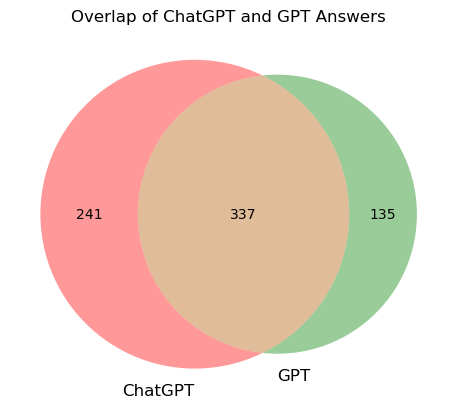

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

both_correct = merged_df[(merged_df['chatgpt_correct'] == True) &
                         (merged_df['gpt_correct'] == True)].shape[0]
only_chatgpt_correct = merged_df[(merged_df['chatgpt_correct'] == True) & (
    merged_df['gpt_correct'] == False)].shape[0]
only_gpt_correct = merged_df[(merged_df['chatgpt_correct'] == False) &
                             (merged_df['gpt_correct'] == True)].shape[0]
neither_correct = merged_df[(merged_df['chatgpt_correct'] == False) &
                            (merged_df['gpt_correct'] == False)].shape[0]

# Create the Venn diagram
venn2(subsets=(only_chatgpt_correct, only_gpt_correct, both_correct),
      set_labels=('ChatGPT', 'GPT'))

# Set the background color to white
plt.gca().set_facecolor('w')

# Add a title to the diagram
plt.title('Overlap of ChatGPT and GPT Answers')

# Show the diagram
plt.show()


In [62]:
both_incorr = merged_df[(merged_df['chatgpt_correct'] == 0) & (merged_df['gpt_correct'] == 0)]
incorr_both_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in both_incorr['id'].to_list():
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        incorr_both_qs = pd.concat([incorr_both_qs,df1])
incorr_both_qs
complete_incorr_both_qs = pd.merge(incorr_both_qs, merged_df, left_on='id_string', right_on='id')
complete_incorr_both_qs = complete_incorr_both_qs.drop(['id', 'correct_answer', 'gpt_correct', 'chatgpt_correct'], axis=1)
# complete_incorr_both_qs

In [153]:
# complete_incorr_both_qs.to_csv('data/complete_incorr_both_models_qs.csv', index=False)

In [63]:
gpt_corrs = merged_df[(merged_df['chatgpt_correct'] == 0) & (merged_df['gpt_correct'] == 1)]
# gpt_corrs

In [66]:
corr_gpt_ans_ids = gpt_corrs['id'].to_list()
corr_gpt_ans = gpt_corrs['correct_answer'].to_list()
corr_gpt_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_gpt_ans_ids:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_gpt_ans_qs = pd.concat([corr_gpt_ans_qs,df1])
        # index += 1

In [69]:
both_corrs = merged_df[(merged_df['chatgpt_correct'] == 1) & (merged_df['gpt_correct'] == 1)].copy()

corr_both_ans = both_corrs['id'].to_list()
corr_both_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_both_ans:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_both_ans_qs = pd.concat([corr_both_ans_qs,df1])
# corr_both_ans_qs

In [71]:
only_chatgpt_corrs = merged_df[(merged_df['chatgpt_correct'] == 1) & (merged_df['gpt_correct'] == 0)].copy()

corr_chatgpt_ans = only_chatgpt_corrs['id'].to_list()
corr_chatgpt_ans_qs = pd.DataFrame(columns=['id_string','question', 'answers', 'label', 'context'])
# index = 0
for i in reclor_train_data:
    if i['id_string'] in corr_chatgpt_ans:
        df1 = pd.DataFrame([[i['id_string'], i['question'], i['answers'], i['label'], i['context']]],\
                            columns=['id_string','question', 'answers', 'label', 'context'])
        corr_chatgpt_ans_qs = pd.concat([corr_chatgpt_ans_qs,df1])
# corr_chatgpt_ans_qs

In [73]:
corr_chatgpt_ans_qs['context_w_length'] = corr_chatgpt_ans_qs['context'].apply(lambda x: len(x.split()))
corr_chatgpt_ans_qs['question_w_length'] = corr_chatgpt_ans_qs['question'].apply(lambda x: len(x.split()))
corr_chatgpt_ans_qs['correct_answer'] = corr_chatgpt_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_chatgpt_ans_qs['corr_answer_w_length'] = corr_chatgpt_ans_qs['correct_answer'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['context_w_length'] = corr_gpt_ans_qs['context'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['question_w_length'] = corr_gpt_ans_qs['question'].apply(lambda x: len(x.split()))
corr_gpt_ans_qs['correct_answer'] = corr_gpt_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_gpt_ans_qs['corr_answer_w_length'] = corr_gpt_ans_qs['correct_answer'].apply(lambda x: len(x.split()))
corr_both_ans_qs['context_w_length'] = corr_both_ans_qs['context'].apply(lambda x: len(x.split()))
corr_both_ans_qs['question_w_length'] = corr_both_ans_qs['question'].apply(lambda x: len(x.split()))
corr_both_ans_qs['correct_answer'] = corr_both_ans_qs.apply(lambda x: x['answers'][x['label']], axis=1)
corr_both_ans_qs['corr_answer_w_length'] = corr_both_ans_qs['correct_answer'].apply(lambda x: len(x.split()))

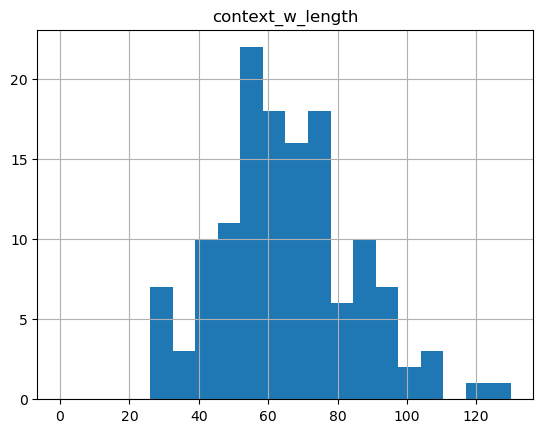

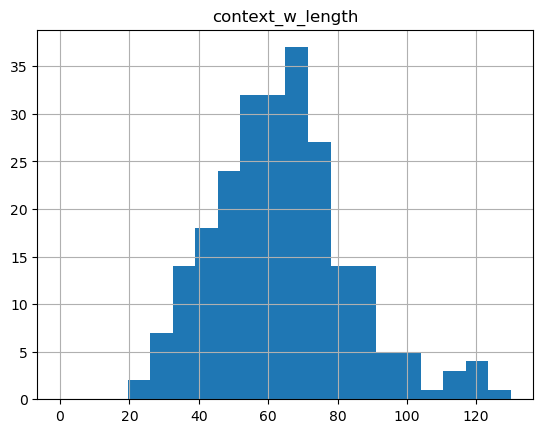

In [74]:
hist = corr_gpt_ans_qs.hist(column='context_w_length', bins=20, range=[0,130])
hist = corr_chatgpt_ans_qs.hist(column='context_w_length', bins=20, range=[0,130])

Text(0, 0.5, 'Frequency')

<Figure size 640x480 with 0 Axes>

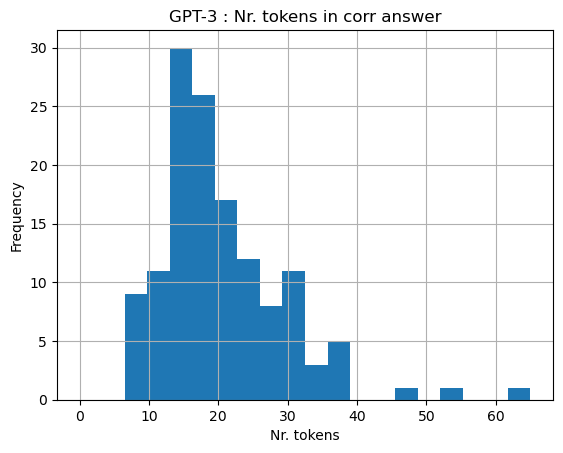

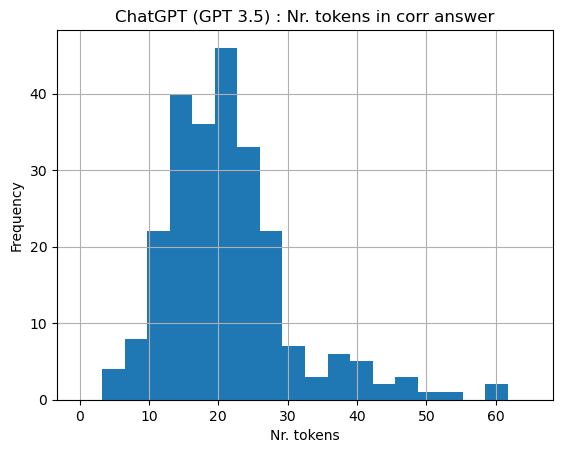

In [75]:
fig = plt.figure()
hist = corr_gpt_ans_qs.hist(column="corr_answer_w_length", bins=20, range=[0,65])
plt.title("GPT-3 : Nr. tokens in corr answer")
plt.xlabel("Nr. tokens")
plt.ylabel("Frequency")
hist = corr_chatgpt_ans_qs.hist(column='corr_answer_w_length', bins=20, range=[0,65])
plt.title("ChatGPT (GPT 3.5) : Nr. tokens in corr answer")
plt.xlabel("Nr. tokens")
plt.ylabel("Frequency")
# pl.title("Histogram of Ages")
# pl.xlabel("Age")
# pl.ylabel("Individuals")


Creating the explanations dataset with the chatgpt explanations for each answer

In [76]:
# answer_list_cgpt = []
# for index, i in enumerate(reclor_train_data):
#     if index>439:
#         single_answer = {}
#         context = i['context']
#         question = i['question']
#         answers = i['answers']
#         id_string = i['id_string']
#         label = i['label']
#         answer_obj = openai.ChatCompletion.create(
#             model="gpt-3.5-turbo",
#             messages=[
#                 {"role": "system", "content": "You are a logician and an LSAT taker."},
#                 {"role": "user", "content": f'Given the context: {context} and question {question}. \
#                     Please choose the correct answer among a list of answer options given: {answers}. Give \
#                     your answer as a number, where 0, 1, 2 and 3 refers to the first, second, third and fourth answer in the answer list respectively.\
#                     Finally, give a single sentence explanation of the general logical reasoning \
#                     you used to arrive at the answer without using the same wording as any of the answer options in your response. \
#                     Stop text generation after the explanation. Do not use any of the same phrasing as the answer options \
#                     anywhere in your response.\
#                     Sample Response: "The answer is 0. Explanation: This is my explanation." '},
#             ]
#         )
#         chatgpt_answer = answer_obj["choices"][0]["message"]["content"]
        
#         single_answer['id'] = id_string
#         single_answer['correct_answer'] = label
#         single_answer['chat_gptanswer'] = chatgpt_answer
#         single_answer['question'] = question
#         single_answer['answers'] = answers
#         single_answer['context'] = context
#         answer_list_cgpt.append(single_answer)
#     # break
    
# answer_list_cgpt
# with open('reclor_all_cgpt_context_w_explanations_0414.json', 'w') as f:
#     # Load the contents of the file into a list
#     json.dump(answer_list_cgpt,f)

In [199]:
# with open('reclor_all_cgpt_context_w_explanations_0414_1624.json', 'w') as f:
#     # Load the contents of the file into a list
#     json.dump(answer_list_cgpt,f)


In [118]:
# Load the JSON file from the reclor folder 
with open('data/reclor_all_cgpt_context_w_explanations_0414_1624.json') as f:
    answer_list_cgpt = json.load(f)

# Check the length of the data
print(len(answer_list_cgpt))

1624


In [78]:
# deep copy the list
answer_list_copy = copy.deepcopy(answer_list_cgpt)

new_list1 = []
# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in answer_list_copy:
    # Use regular expressions to extract the answer label 
    response = {}
    
    answer_match = re.search(r'(\b[0-9]\b)', item['chat_gptanswer'])

    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    if answer_match:
        # Update the dictionary value with the extracted number
        response['chat_gptanswer'] = int(answer_match.group(1))
        response['correct'] = response['chat_gptanswer']==item['correct_answer']
        response['explanation'] = [".".join(item['chat_gptanswer'].split('.')[1:3])]
        response['context'] = item['context']
        if response['correct']:
            response['context_extended'] = item['context'] + response['explanation'][0]
        else:
            response['context_extended'] = item['context']
        response['question'] = item['question']
        response['answers'] = item['answers']
    else:
        # If the regular expression doesn't match, set the value to None
        print(f'warning + {response["id"]}')
        continue  
    new_list1.append(response)

In [87]:
df = pd.DataFrame(new_list1)
corr_answer = []
for i in range(df.shape[0]):
    a = df.iloc[i].answers
    corr_answer.append(a[int(df.iloc[i].correct_answer)])
df['corr_answer_sentence'] = corr_answer
df['explanation'] = df['explanation'].apply(lambda x: x[0])
# df

In [88]:
df_corr = df[df['correct']==True]
# df_corr.to_csv("cgpt_corr_resp_991.csv", index=False)

In [104]:
df['correct'].value_counts()

True     991
False    633
Name: correct, dtype: int64

In [220]:
# df = pd.DataFrame(new_list1)
# df_correct = df[df['correct']==True]
# gpt_answer_listcorr = []
# for i in range(df_correct.shape[0]):
#         single_answer = {}
#         context = df_correct.iloc[i].context
#         question = df_correct.iloc[i].question
#         answers = df_correct.iloc[i].answers
#         id_string = df_correct.iloc[i].id
#         label = df_correct.iloc[i].correct_answer

#         answer_obj = openai.Completion.create(
#             model="text-davinci-003",
#             max_tokens=300,
#             prompt=f'Context: {context} and question {question} choosing the correct answer among a list of answers in {answers}. State the position of the answer you have chosen in the list of answers. For example, 0 if it is the first answer; 1 if it is the second one; 2 if it is the third one, 3 if it is the fourth one. Example response: "1" Answer: ?',
#         )

#         gpt3_answer = answer_obj["choices"][0]["text"]

#         single_answer['id'] = id_string
#         single_answer['correct_answer'] = str(label)
#         single_answer['gpt3_answer'] = gpt3_answer
#         # single_answer['correct'] = single_answer['correct_answer'] == single_answer['gpt3_answer']
#         gpt_answer_listcorr.append(single_answer)
# with open('reclor_allcorr_gpt3_context_0414.json', 'w') as f:
#     # Load the contents of the file into a list
#     json.dump(gpt_answer_listcorr,f)

In [117]:
# Load the JSON file from the reclor folder 
with open('data/reclor_allcorr_gpt3_context_w_explanations_0414.json') as f:
    gpt_answer_listcorr = json.load(f)

# Check the length of the data
print(len(gpt_answer_listcorr))

991


In [110]:
copy_gpt_list = copy.deepcopy(gpt_answer_listcorr)
gpt_list_answers = []

# Iterate through the list of dictionaries and update the 'chat_gptanswer' value
for item in gpt_answer_listcorr:
    # Use regular expressions to extract the answer label
    response = {}
    response['id'] = item['id']
    response['correct_answer'] = item['correct_answer']
    
    # Create a regular expression pattern to match the answer label
    regex_pattern = re.compile(r'\b(first|second|third|fourth)\b')
    # item['gpt3_answer'] = regex_pattern.sub(lambda m: {
    #                                         'first': '0', 'second': '1', 'third': '2', 'fourth': '3'}[m.group(1)], item['gpt3_answer'])

    answer_match = re.search(r'(\b[0-9]\b)', item['gpt3_answer'])

    if answer_match:
        # Update the dictionary value with the extracted number
        response['gpt3_answer'] = int(answer_match.group(1))
    else:
        # If the regular expression doesn't match, set the value to None
        # print(item['id'])
        continue
    
    gpt_list_answers.append(response)
df_gpt_w_cont = pd.DataFrame(gpt_list_answers)
df_gpt_w_cont['correct_answer'] = df_gpt_w_cont['correct_answer'].astype(int)
df_gpt_w_cont['correct'] = (df_gpt_w_cont['correct_answer'] == df_gpt_w_cont['gpt3_answer'])
df_gpt_w_cont['correct'].value_counts()

True     788
False    163
Name: correct, dtype: int64

Text(0, 0.5, 'Frequency')

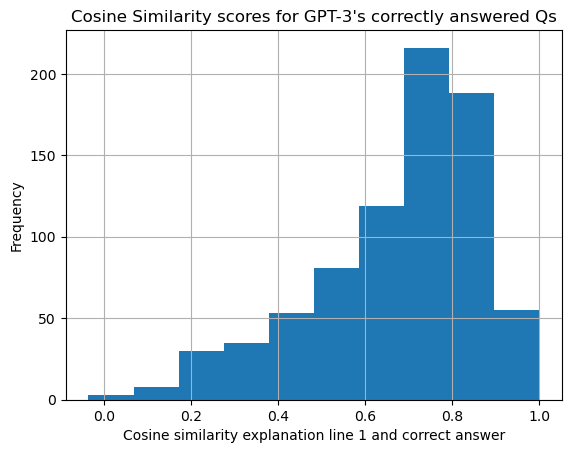

In [119]:
df_w_sim = pd.read_csv("data/sent_similarity_2.csv")

df_w_sim_merged = df_w_sim.merge(df_gpt_w_cont, on='id')
df_corr_gpt = df_w_sim_merged[df_w_sim_merged['correct_y']==True].copy()
df_incorr_gpt = df_w_sim_merged[df_w_sim_merged['correct_y']==False].copy()
df_corr_gpt['cos_sim_1'].hist()
plt.title("Cosine Similarity scores for GPT-3's correctly answered Qs")
plt.xlabel("Cosine similarity explanation line 1 and correct answer")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

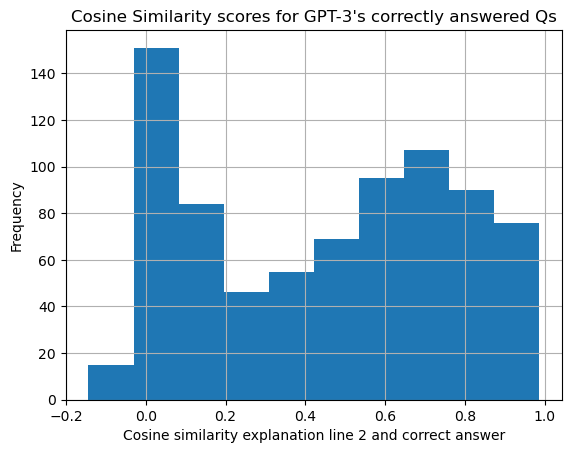

In [114]:
df_corr_gpt['cos_sim_2'].hist()
plt.title("Cosine Similarity scores for GPT-3's correctly answered Qs")
plt.xlabel("Cosine similarity explanation line 2 and correct answer")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

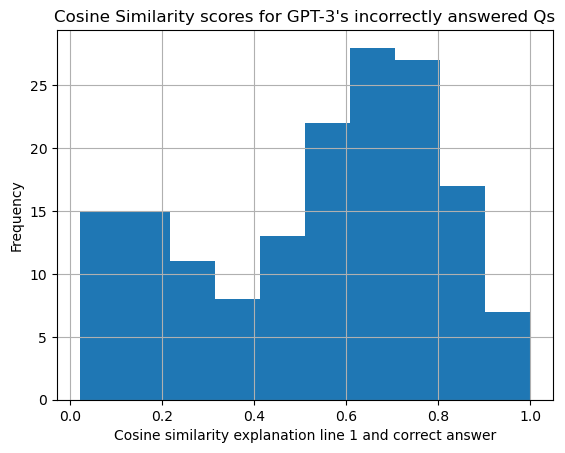

In [115]:
df_incorr_gpt['cos_sim_1'].hist()
plt.title("Cosine Similarity scores for GPT-3's incorrectly answered Qs")
plt.xlabel("Cosine similarity explanation line 1 and correct answer")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

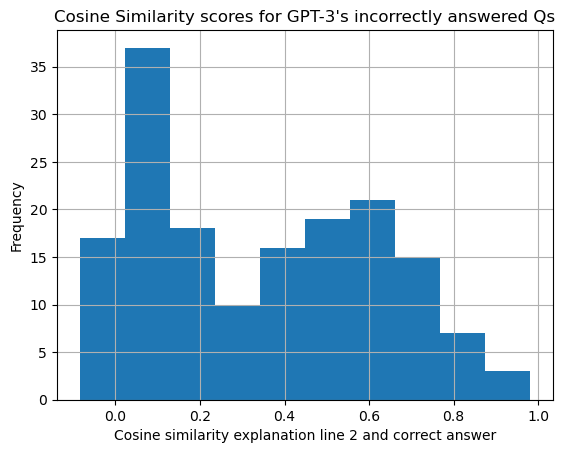

In [116]:
df_incorr_gpt['cos_sim_2'].hist()
plt.title("Cosine Similarity scores for GPT-3's incorrectly answered Qs")
plt.xlabel("Cosine similarity explanation line 2 and correct answer")
plt.ylabel("Frequency")